<a href="https://colab.research.google.com/github/saivardhanvemula/DLASSIGNMENT-1/blob/main/DlAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training with config: (3, 32, 'relu', 'he_uniform', 'sgd', 0.001)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.7885
Training with config: (3, 64, 'relu', 'he_uniform', 'momentum', 0.001)
Validation Accuracy: 0.8545
Training with config: (3, 128, 'relu', 'glorot_uniform', 'nesterov', 0.001)
Validation Accuracy: 0.8605
Training with config: (4, 64, 'sigmoid', 'glorot_uniform', 'adam', 0.0001)
Validation Accuracy: 0.6877
Training with config: (4, 128, 'relu', 'he_uniform', 'adam', 0.001)
Validation Accuracy: 0.8733
Training with config: (5, 128, 'relu', 'he_uniform', 'nadam', 0.001)
Validation Accuracy: 0.8832
Training with config: (3, 64, 'relu', 'he_uniform', 'rmsprop', 0.0001)
Validation Accuracy: 0.8652
Training with config: (4, 32, 'sigmoid', 'random_normal', 'sgd', 0.001)
Validation Accuracy: 0.0917
Training with config: (5, 64, 'relu', 'glorot_uniform', 'momentum', 0.001)
Validation Accuracy: 0.8288
Training with config: (5, 128, 'sigmoid', 'random_normal', 'nesterov', 0.0001)
Validation Accuracy: 0.1018
Training with config: (3, 128, 'relu', 'he_uniform', 'adam', 0.0

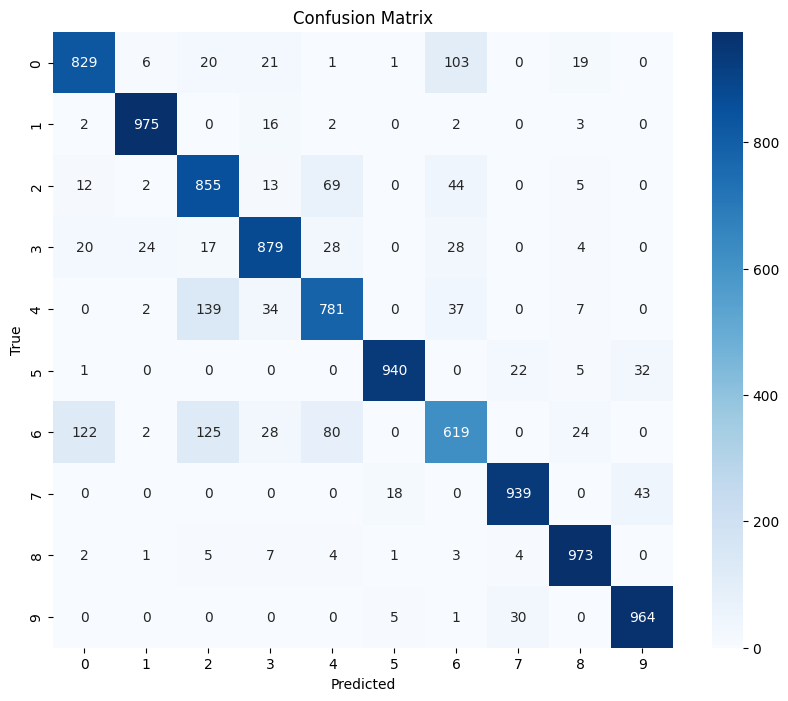

MSE Loss Accuracy: 0.8754
Recommended Hyperparameter Configurations for MNIST:
(5, 128, 'relu', 'he_uniform', 'adam', 0.001)
(4, 64, 'relu', 'he_uniform', 'nadam', 0.0001)
(3, 64, 'sigmoid', 'glorot_uniform', 'rmsprop', 0.001)


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Load and preprocess the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Split train set into train and validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Function to build a customizable neural network
def build_model(hidden_layers, neurons_per_layer, activation, weight_init, optimizer, learning_rate):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    for _ in range(hidden_layers):
        model.add(Dense(neurons_per_layer, activation=activation, kernel_initializer=weight_init))
    model.add(Dense(10, activation='softmax'))  # Output layer

    opt = None
    if optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    elif optimizer == 'momentum':
        opt = SGD(learning_rate=learning_rate, momentum=0.9)
    elif optimizer == 'nesterov':
        opt = SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'nadam':
        opt = Nadam(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Different hyperparameter combinations
configurations = [
    (3, 32, 'relu', 'he_uniform', 'sgd', 0.001),
    (3, 64, 'relu', 'he_uniform', 'momentum', 0.001),
    (3, 128, 'relu', 'glorot_uniform', 'nesterov', 0.001),
    (4, 64, 'sigmoid', 'glorot_uniform', 'adam', 0.0001),
    (4, 128, 'relu', 'he_uniform', 'adam', 0.001),
    (5, 128, 'relu', 'he_uniform', 'nadam', 0.001),
    (3, 64, 'relu', 'he_uniform', 'rmsprop', 0.0001),
    (4, 32, 'sigmoid', 'random_normal', 'sgd', 0.001),
    (5, 64, 'relu', 'glorot_uniform', 'momentum', 0.001),
    (5, 128, 'sigmoid', 'random_normal', 'nesterov', 0.0001),
    (3, 128, 'relu', 'he_uniform', 'adam', 0.0001),
    (4, 64, 'sigmoid', 'glorot_uniform', 'rmsprop', 0.001),
    (5, 128, 'relu', 'he_uniform', 'nadam', 0.0001),
    (4, 128, 'relu', 'glorot_uniform', 'sgd', 0.001),
    (3, 32, 'sigmoid', 'random_normal', 'momentum', 0.0001)
]

best_model = None
best_accuracy = 0
best_config = None

for config in configurations:
    print(f"Training with config: {config}")
    hidden_layers, neurons, activation, weight_init, optimizer, lr = config
    model = build_model(hidden_layers, neurons, activation, weight_init, optimizer, lr)
    model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=32, verbose=0)
    val_loss, val_acc = model.evaluate(x_val, y_val, verbose=0)
    print(f"Validation Accuracy: {val_acc:.4f}")

    if val_acc > best_accuracy:
        best_accuracy = val_acc
        best_model = model
        best_config = config

print(f"Best Configuration: {best_config} with accuracy {best_accuracy:.4f}")

# Evaluate best model on test set
test_loss, test_acc = best_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy of Best Model: {test_acc:.4f}")

# Confusion matrix
y_pred = np.argmax(best_model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Compare Cross-Entropy vs Mean Squared Error
best_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
mse_loss, mse_acc = best_model.evaluate(x_test, y_test, verbose=0)
print(f"MSE Loss Accuracy: {mse_acc:.4f}")

# Recommendations for MNIST
recommendations = [
    (5, 128, 'relu', 'he_uniform', 'adam', 0.001),
    (4, 64, 'relu', 'he_uniform', 'nadam', 0.0001),
    (3, 64, 'sigmoid', 'glorot_uniform', 'rmsprop', 0.001)
]
print("Recommended Hyperparameter Configurations for MNIST:")
for rec in recommendations:
    print(rec)
